In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('data/temperature/data.csv')

In [32]:
df.head()

,Date,Value,Anomaly
0,193804,57.3,0.8
1,193805,65.6,-0.8
2,193806,74.3,-1.4
3,193807,81.3,1.5
4,193808,82.0,4.0


In [33]:
df.tail()

,Date,Value,Anomaly
1012,202208,79.7,1.7
1013,202209,71.4,1.2
1014,202210,58.7,-0.4
1015,202211,47.3,2.1
1016,202212,35.9,1.3


In [34]:
# if value is -99 change it to nan
df['Value'] = df['Value'].replace(-99, np.nan)
df['Anomaly'] = df['Anomaly'].replace(-99, np.nan)

In [35]:
# show nan values
df.isna().sum()

Date       0
Value      1
Anomaly    1
dtype: int64

In [36]:
df.interpolate(inplace=True)

In [37]:
# date is in formay YYYYMM and I want to change it to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')
df.set_index('Date', inplace=True)
df.head()

,Value,Anomaly
Date,,
1938-04-01,57.3,0.8
1938-05-01,65.6,-0.8
1938-06-01,74.3,-1.4
1938-07-01,81.3,1.5
1938-08-01,82.0,4.0


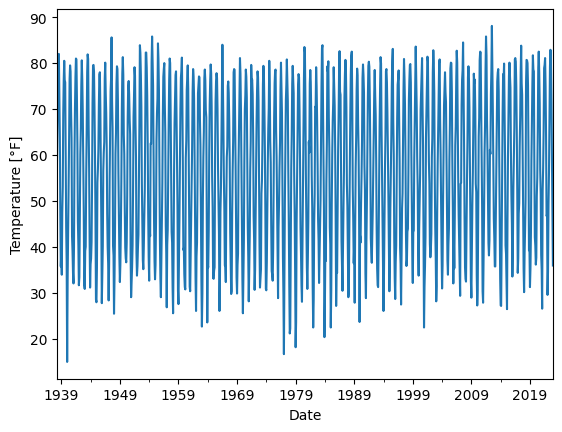

In [38]:
# plot the data
df['Value'].plot()
plt.ylabel('Temperature [°F]')
plt.show()

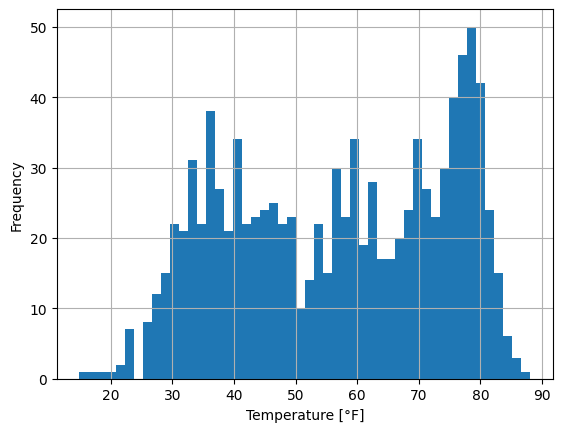

In [39]:
# plot histogram
df['Value'].hist(bins=50)
plt.xlabel('Temperature [°F]')
plt.ylabel('Frequency')
plt.show()

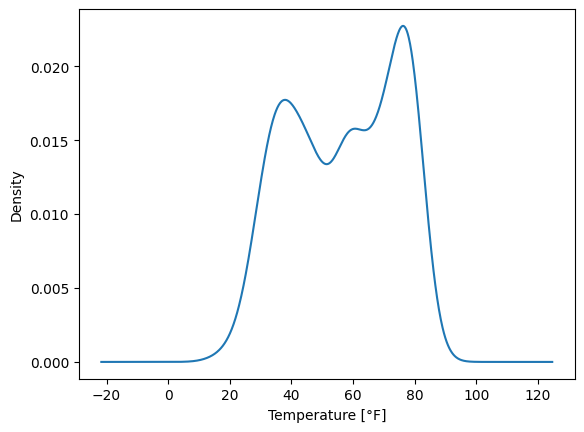

In [40]:
# plot kernel density estimation
df['Value'].plot(kind='kde')
plt.xlabel('Temperature [°F]')
plt.ylabel('Density')
plt.show()

In [41]:
df.describe()

,Value,Anomaly
count,1017.000000,1017.000000
mean,56.828614,0.444739
std,17.508026,3.752146
min,14.900000,-15.600000
25%,40.700000,-1.700000
50%,58.500000,0.400000
75%,73.600000,2.800000
max,88.100000,16.500000


In [42]:
# rank the data by value out of len(df)
df[f'Rank out of {len(df)}'] = df['Value'].rank().astype(int)
df.head()

,Value,Anomaly,Rank out of 1017
Date,,,
1938-04-01,57.3,0.8,493
1938-05-01,65.6,-0.8,626
1938-06-01,74.3,-1.4,777
1938-07-01,81.3,1.5,984
1938-08-01,82.0,4.0,991


In [44]:
# rearange the columns to be in the order: Date, Value, Rank, Anomaly
df = df[['Value', f'Rank out of {len(df)}', 'Anomaly']]
df

,Value,Rank out of 1017,Anomaly
Date,,,
1938-04-01,57.3,493,0.8
1938-05-01,65.6,626,-0.8
1938-06-01,74.3,777,-1.4
1938-07-01,81.3,984,1.5
1938-08-01,82.0,991,4.0
...,...,...,...
2022-08-01,79.7,938,1.7
2022-09-01,71.4,724,1.2
2022-10-01,58.7,513,-0.4
